1. We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the datasetgiven below.Task:1.fitting it to the periodic function2.plot the fitDataMax = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 ])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 ])

Text(0, 0.5, 'Min and max temperature')

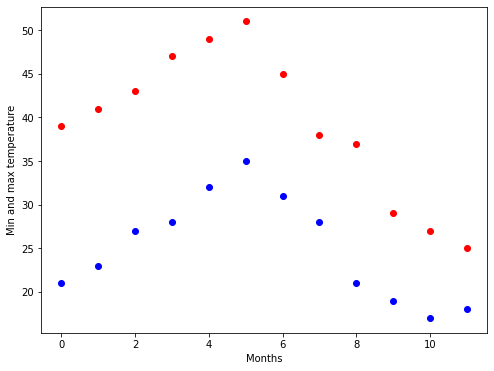

In [2]:
import matplotlib.pyplot as plt

month = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(month, Max, 'ro')
plt.plot(month, Min, 'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature')

In [3]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month, Min, [-40, 20, 0])

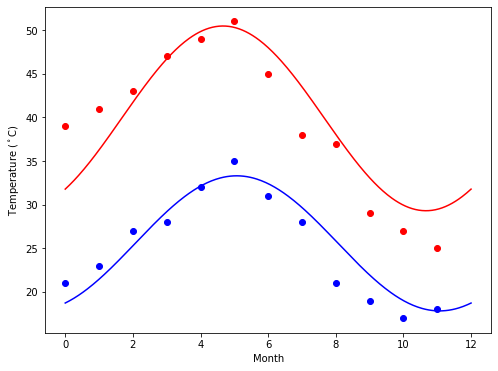

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## This assignment is for visualization using matplotlib:Charts to plot:1. Create a pie chart presenting the male/female proportion2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
import pandas as pd
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [6]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [7]:
d = titanic['sex']
d 

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

In [8]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [9]:
a= {'female':1,'male':0}
d = d.map(a)

In [10]:
d = d.dropna()

In [11]:
d

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1304    1.0
1305    1.0
1306    0.0
1307    0.0
1308    0.0
Name: sex, Length: 1309, dtype: float64

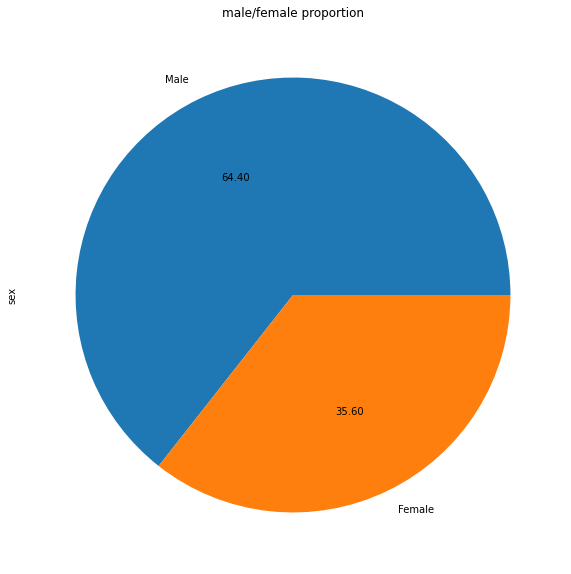

In [12]:
d.value_counts().plot.pie(figsize = (10,10),labels= ['Male','Female'],autopct = '%.2f')
plt.title('male/female proportion')
plt.show()

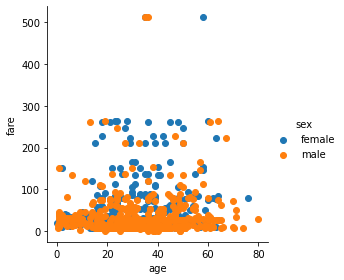

In [13]:
import seaborn as sns
sns.FacetGrid(titanic,hue='sex',size=4).map(plt.scatter,'age','fare').add_legend();
plt.show()